# CodeClause_Task - 3 Uber Data Analysis 

### Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df = pd.read_csv(r"C:\Users\welcome\Downloads\Uber Driver Analysis with python\Uber Drives - .csv")

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
#check size of the dataset
df.shape

(1156, 7)

In [5]:
# Let's explore variables, their data types, and total non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [9]:
df.columns=['START_DATE','END_DATE','CATEGORY','START','STOP','MILES','PURPOSE']

# Data Cleaning

## Check for Mising Values

If a data is not available, Python uses **NaN** to represnet it.

Let's check below if there data points missing in our dataset.

In [10]:
df.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

Now we will remove inconsistent records and handle missing values. We will replace NULL values in the **PURPOSE** feature with the **UNKNOWN** string. We will drop one record containing a NULL value in remaining feature.

In [11]:
# Filling NULL values in feature PURPOSE
df['PURPOSE'] = df['PURPOSE'].fillna("UNKNOWN")

# After this imputation, we are left with 1 NULL value in features - 
#END_DATE, CATEGORY, START, and STOP. We can handle the NULL values by dropping that record

df.dropna(inplace = True)

df.isnull().sum()


START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

# Data Preprocessing

Now,We will perform multiple preprocessing and feature engineering steps, as mentioned below -

<li>START_DATE and END_DATE to be converted into datetime format.
<li>Create a new feature representing the time of the day - morning, afternoon, evening, or night.
<li>Create a new feature representing the day of the week, such as Monday, Sunday, etc.
<li>Create a new feature representing the month of the ride, such as March, June, etc.
<li>We will calculate the duration of the ride by subtracting end time and start time of the ride.

In [13]:
# converting START_DATE and END_DATE into datetime format
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

In [14]:
#create new feature representing time of the ride - morning, afternoon, evening, night
df['TIME_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df['TIME_OF_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df['TIME_OF_DAY'] = pd.cut(x = df['TIME_OF_DAY'], bins = [0, 6, 11, 17, 21, 24],\
                             labels = ['Night', 'Morning','Afternoon','Evening','Night'], ordered = False)

In [15]:
#create new feature representing month of the ride
df['MONTH_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i : i.month)
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
df['MONTH_OF_THE_RIDE'] = df['MONTH_OF_THE_RIDE'].map(month_label)

In [16]:
#create new feature representing day (week) of the ride
df['DAY_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i : i.weekday())
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

df['DAY_OF_THE_RIDE'] = df['DAY_OF_THE_RIDE'].map(day_label)


In [17]:
# duration of the ride
df['DURATION_OF_THE_RIDE'] = (df['END_DATE'] - df['START_DATE']).astype('timedelta64[m]')

df.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan,Fri,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,Jan,Sat,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Jan,Sat,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Jan,Tues,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Jan,Wed,67.0


# Data Exploration
<br>
<li>Let’s explore summary statistics of the numerical features present in the dataset. As we can see below, the mean miles of a ride are 10.56, and the mean duration of a ride is 23 minutes. The maximum number of miles of a ride is 310, and the max duration of a ride is 336 minutes.

In [18]:
# summary statistics of the dataset
df.describe()

,MILES,TIME_DAY,DURATION_OF_THE_RIDE
count,1155.000000,1155.000000,1155.000000
mean,10.566840,14.696104,23.243290
std,21.579106,4.575226,27.318277
min,0.500000,0.000000,0.000000
25%,2.900000,12.000000,10.000000
50%,6.000000,15.000000,16.000000
75%,10.400000,18.000000,27.500000
max,310.300000,23.000000,336.000000


<li>Let’s explore the minimum and max value of the START_DATE feature. As we can see below, this dataset contains rides for the entire year 2016.

In [20]:
print('Min Timestamp in START_TIME is - {}'.format(df['START_DATE'].min()))
print('Max Timestamp in START_TIME is - {}'.format(df['START_DATE'].max()))


Min Timestamp in START_TIME is - 2016-01-01 21:11:00
Max Timestamp in START_TIME is - 2016-12-31 22:08:00


<li> There are four categorical features in the dataset - CATEGORY, START, STOP, and PURPOSE. Let’s explore the count of unique categories in each feature.

In [21]:
print("Total number of unique categories in CATEGORY - {}".format(df['CATEGORY'].nunique()))
print("Total number of unique categories in PURPOSE - {}".format(df['PURPOSE'].nunique()))
print("Total number of unique location in START - {}".format(df['START'].nunique()))
print("Total number of unique location in STOP - {}".format(df['STOP'].nunique()))


Total number of unique categories in CATEGORY - 2
Total number of unique categories in PURPOSE - 11
Total number of unique location in START - 177
Total number of unique location in STOP - 188


# Data Visualization<br>

<li>Now, we will explore the data by using various visualization techniques. 
    <li>First, let’s explore the distribution of categories in CATEGORY and PURPOSE features and the top 10 locations for START and STOP.

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


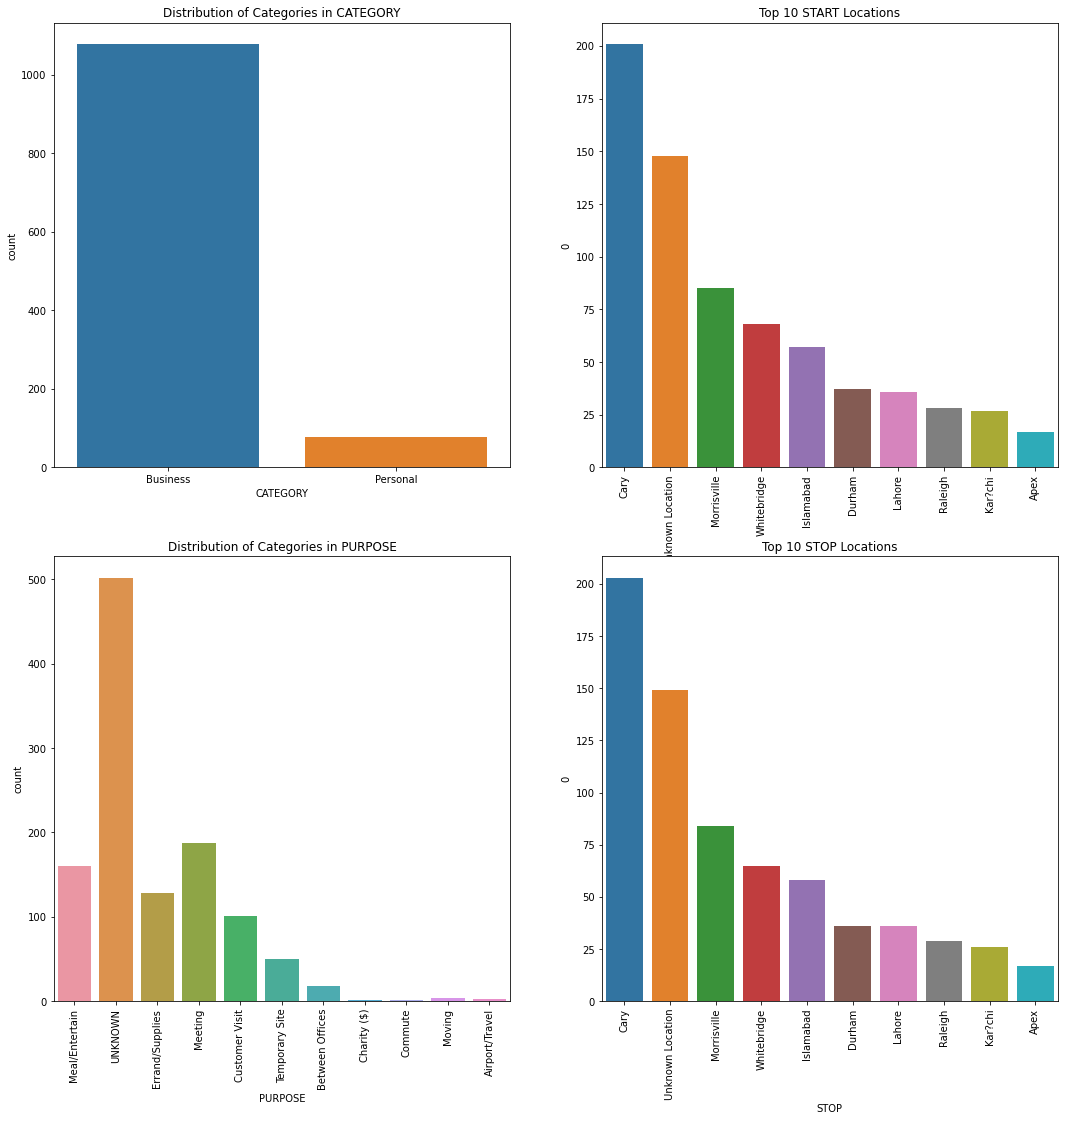

In [22]:
fig, axes = plt.subplots(2, 2, figsize = (18,18))

# label distribution for CATEGORY
sns.countplot(df['CATEGORY'], ax = axes[0,0])
axes[0, 0].set_title('Distribution of Categories in CATEGORY')

# label distribution for PURPOSE
sns.countplot(df['PURPOSE'], ax = axes[1,0])
axes[1, 0].set_title('Distribution of Categories in PURPOSE')
axes[1, 0].tick_params(axis='x', rotation = 90)

# top 10 locations for START and STOP
temp = pd.DataFrame(df.groupby('START').size()).nlargest(10, columns = 0).reset_index(drop = False)
sns.barplot(x = 'START', y = 0, data = temp, ax = axes[0,1])
axes[0, 1].set_title('Top 10 START Locations')
axes[0, 1].tick_params(axis='x', rotation = 90)

temp = pd.DataFrame(df.groupby('STOP').size()).nlargest(10, columns = 0).reset_index(drop = False)
sns.barplot(x = 'STOP', y = 0, data = temp, ax = axes[1,1])
axes[1, 1].set_title('Top 10 STOP Locations')
axes[1, 1].tick_params(axis='x', rotation = 90)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TIME_OF_DAY', ylabel='count'>

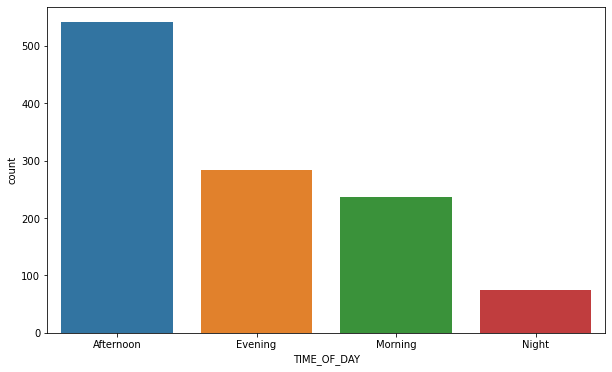

In [23]:
# distribution of rides based on time of the day
plt.figure(figsize = (10,6))
sns.countplot(df['TIME_OF_DAY'])

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MONTH_OF_THE_RIDE', ylabel='count'>

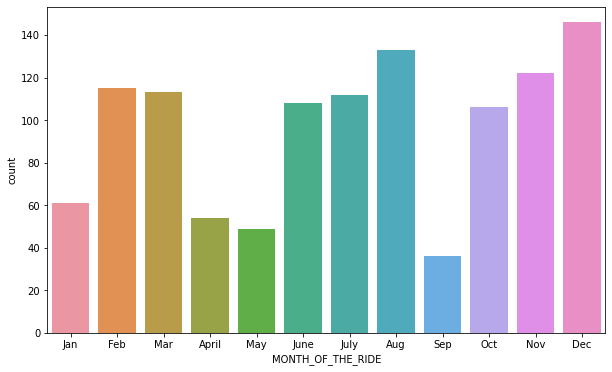

In [25]:
# distribution of rides based on month of the day
plt.figure(figsize = (10,6))
sns.countplot(df['MONTH_OF_THE_RIDE'])


In [28]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'TIME_DAY', 'TIME_OF_DAY', 'MONTH_OF_THE_RIDE',
       'DAY_OF_THE_RIDE', 'DURATION_OF_THE_RIDE'],
      dtype='object')

<AxesSubplot:xlabel='MONTH_OF_THE_RIDE', ylabel='DURATION_OF_THE_RIDE'>

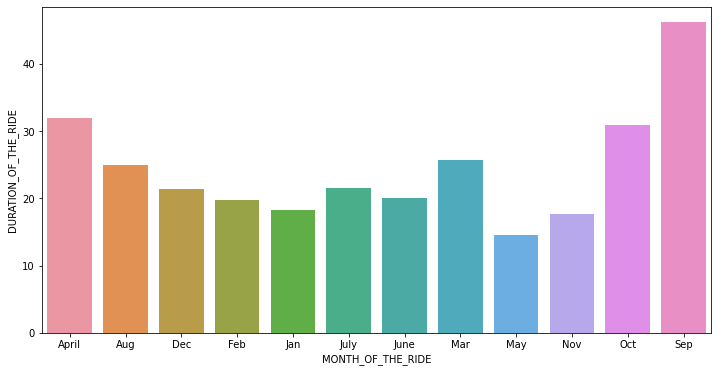

In [32]:
plt.figure(figsize = (12,6))
temp = df.groupby('MONTH_OF_THE_RIDE')['DURATION_OF_THE_RIDE'].mean().reset_index()
sns.barplot(x = 'MONTH_OF_THE_RIDE', y = 'DURATION_OF_THE_RIDE', data = temp)